In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import flopy.modflow as mf
import flopy.utils as fu
import shutil

%matplotlib inline

In [2]:
workspace = os.path.join('ascii')
output = os.path.join('output')

In [3]:
if os.path.exists(workspace):
    shutil.rmtree(workspace)

if os.path.exists(output):
    shutil.rmtree(output)

if not os.path.exists(workspace):
    os.makedirs(workspace)

if not os.path.exists(output):
    os.makedirs(output)

### Setup MF-Package

In [4]:
modelname = 'rio_primero'

In [5]:
ml = mf.Modflow(modelname=modelname, exe_name='mf2005', version='mf2005', model_ws=workspace)

### Setup Discretization Package

In [6]:
nlay = 1
nrow = 6
ncol = 11

area_width_x = 11000
area_width_y = 6000

delc = area_width_x/ncol
delr = area_width_y/nrow

top = 460
botm = 390

nper = 1

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfdis.ModflowDis'> <class 'flopy.modflow.mfdis.ModflowDis'>
replacing existing Package...


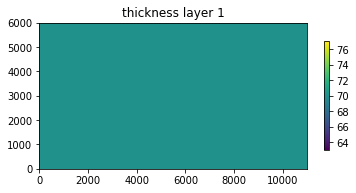

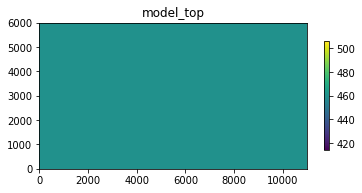

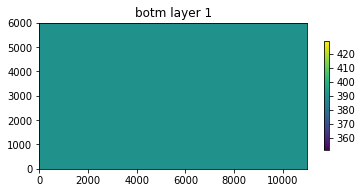

In [21]:
dis = mf.ModflowDis(
    ml, 
    nlay=nlay,
    nrow=nrow, 
    ncol=ncol, 
    delr=delr, 
    delc=delc, 
    top=top, 
    botm=botm, 
    nper=nper, 
    steady=True
)

dis.plot()

### Setup Basic-Package

Specify boundary conditions and starting heads.

We can set one value for all cells.

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfbas.ModflowBas'> <class 'flopy.modflow.mfbas.ModflowBas'>
replacing existing Package...


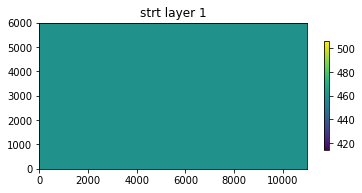

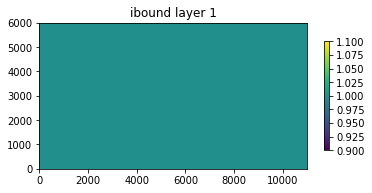

In [22]:
ibound = 1
strt = top

bas = mf.ModflowBas(ml, ibound=ibound, strt=strt)

bas.plot()

### Setup Constant Head Boundaries

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfchd.ModflowChd'> <class 'flopy.modflow.mfchd.ModflowChd'>
replacing existing Package...


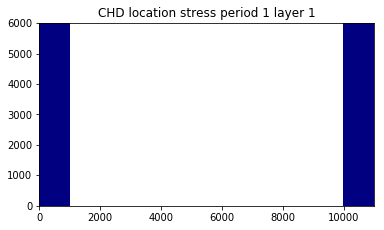

In [23]:
stress_period_data = {
    0: [
        [0, 0, 0, 450, 450],
        [0, 1, 0, 450, 450],
        [0, 2, 0, 450, 450],
        [0, 3, 0, 450, 450],
        [0, 4, 0, 450, 450],
        [0, 5, 0, 450, 450],
        [0, 0, 10, 445, 445],
        [0, 1, 10, 445, 445],
        [0, 2, 10, 445, 445],
        [0, 3, 10, 445, 445],
        [0, 4, 10, 445, 445],
        [0, 5, 10, 445, 445],
    ]
}

chd = mf.ModflowChd(ml, stress_period_data=stress_period_data)

chd.plot()

### Setup Wells

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...


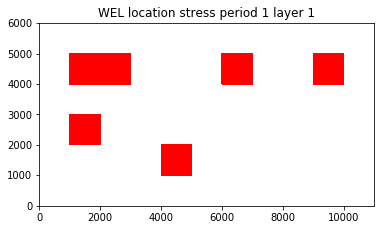

In [24]:
welSp = {
    0: [
        [0, 1, 1, -5000],
        [0, 1, 2, -5000],
        [0, 1, 6, -10000],
        [0, 1, 9, -5000],
        [0, 3, 1, -5000],
        [0, 4, 4, -5000],
    ]
}
wel = mf.ModflowWel(ml, stress_period_data=welSp)

wel.plot()

### Setup River Boundary

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfriv.ModflowRiv'> <class 'flopy.modflow.mfriv.ModflowRiv'>
replacing existing Package...


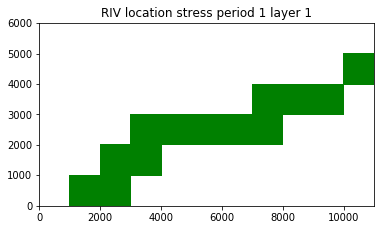

In [27]:
stress_period_data = {
    0: [
        [0, 5, 1, 450, 86.4, 448],
        [0, 5, 2, 450, 86.4, 448],
        [0, 4, 2, 450, 86.4, 448],
        [0, 4, 3, 450, 86.4, 448],
        [0, 3, 3, 450, 86.4, 448],
        [0, 3, 4, 450, 86.4, 448],
        [0, 3, 5, 450, 86.4, 448],
        [0, 3, 6, 450, 86.4, 448],
        [0, 3, 7, 450, 86.4, 448],
        [0, 2, 7, 450, 86.4, 448],
        [0, 2, 8, 450, 86.4, 448],
        [0, 2, 9, 450, 86.4, 448],
        [0, 1, 10, 450, 86.4, 448],        
    ]
}
riv = mf.ModflowRiv(ml, stress_period_data=stress_period_data)

riv.plot()

### Setup Recharge Boundary

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfrch.ModflowRch'> <class 'flopy.modflow.mfrch.ModflowRch'>
replacing existing Package...


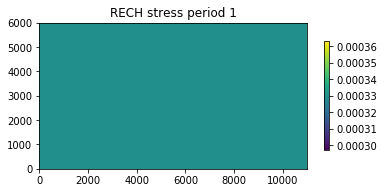

In [28]:
rech = {}
rech[0] = 0.00033
rch = mf.ModflowRch(ml, rech=rech)

rch.plot()

### Setup Soilproperties and Flow-Package

****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...


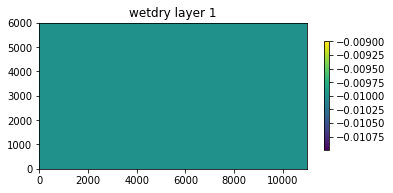

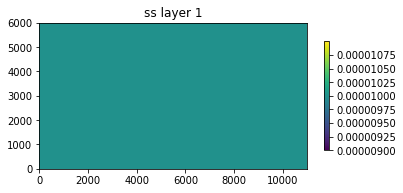

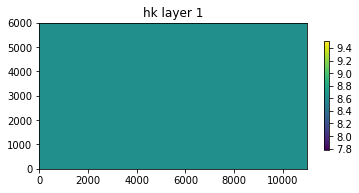

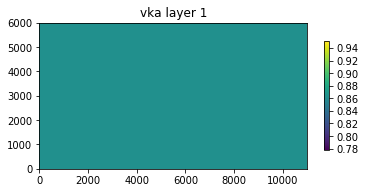

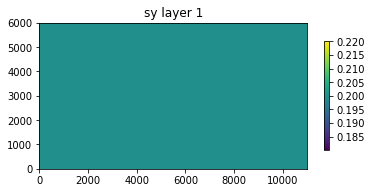

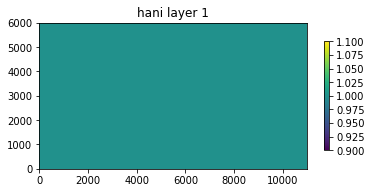

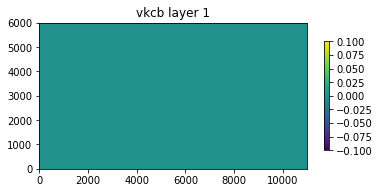

In [29]:
hk = 8.64
vka = 0.864
ss = 1e-5
sy = 0.2

lpf = mf.ModflowLpf(ml, hk=hk, vka=vka, laytyp=1, ss=ss, sy=sy)

lpf.plot()

### Setup Solver Package and Output-control with defaults

In [14]:
pcg = mf.ModflowPcg(ml, rclose=1e-2, hclose=1e-2)
oc = mf.ModflowOc(ml)

### Write Model input and run the model

In [15]:
ml.write_input()
ml.run_model()

FloPy is using the following executable to run the model: /usr/local/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: rio_primero.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/09/19 16:27:58

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2018/09/19 16:27:58
 Elapsed run time:  0.006 Seconds

  Normal termination of simulation


(True, [])

### Read output file

In [16]:
hds = fu.HeadFile(os.path.join(workspace, modelname + '.hds'))
h = hds.get_data(kstpkper=(0, 0))

### Plot output file

[]

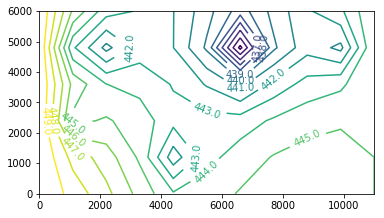

In [17]:
x = np.linspace(0, delr * ncol, ncol)
y = np.linspace(delr * nrow, 0, nrow)

c = plt.contour(x, y, h[0], np.arange(430, 450, 1))
plt.clabel(c, fmt='%2.1f')
plt.axis('scaled')
plt.plot()